In [31]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd

training = pd.read_csv("../../../../../res/churndata/training.csv")
test = pd.read_csv("../../../../../res/churndata/test.csv")
unseen = pd.read_csv("../../../../../res/churndata/unseen.csv")

In [32]:
X_train  = training.drop(["Churn?"], axis=1)
y_train = training["Churn?"]

X_test  = test.drop(["Churn?"], axis=1)
y_test = test["Churn?"]

X_unseen  = unseen.drop(["Churn?"], axis=1)
y_unseen = unseen["Churn?"]

In [33]:
gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)

In [34]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
unseen_score = clf.score(X_unseen, y_unseen)

print(train_score)
print(test_score)
print(unseen_score)

0.8645520788684098
0.8663663663663663
0.8532934131736527


In [36]:
from sklearn.inspection import permutation_importance
permutation_importance(clf, X_train, y_train)

{'importances_mean': array([ 0.00060009,  0.0516931 ,  0.00617231,  0.00514359,  0.01320189,
        -0.00171453,  0.01320189,  0.00145735, -0.00137162,  0.00145735,
         0.00060009,  0.00102872,  0.00060009,  0.00068581, -0.00051436,
         0.00068581,  0.02048864]),
 'importances_std': array([0.00043712, 0.00144977, 0.0009233 , 0.00038338, 0.00214145,
        0.00076676, 0.00214145, 0.000795  , 0.00049987, 0.000795  ,
        0.00069645, 0.00088261, 0.00069645, 0.00064152, 0.00073745,
        0.00064152, 0.00298693]),
 'importances': array([[ 0.0012859 ,  0.00042863,  0.00042863,  0.        ,  0.00085727],
        [ 0.05357908,  0.05015002,  0.05143592,  0.05015002,  0.05315045],
        [ 0.00728676,  0.00557222,  0.00557222,  0.00728676,  0.00514359],
        [ 0.00557222,  0.00557222,  0.00514359,  0.00471496,  0.00471496],
        [ 0.01500214,  0.01543078,  0.01157308,  0.00985855,  0.01414488],
        [-0.00300043, -0.00214316, -0.00085727, -0.0012859 , -0.0012859 ],
   

Text(0.5, 0, 'Permutation Importance')

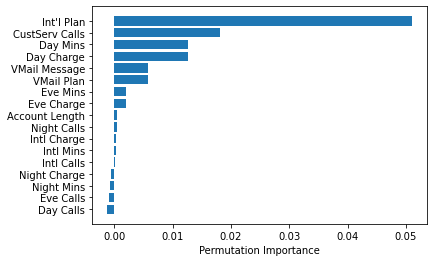

In [37]:
perm_importance = permutation_importance(clf, X_train, y_train)
features = clf.feature_names_in_

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [38]:
from sklearn.model_selection import cross_val_predict
test_predicted = cross_val_predict(clf, X_test, y_test, cv=5)
print(test_predicted[:100])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0]


[[522  45]
 [ 45  54]]
True negatives: 522
False negatives: 45
True Positives: 54
False Positives: 45


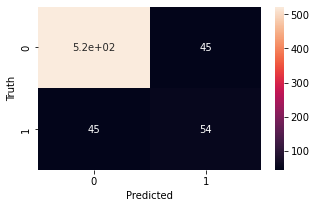

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,test_predicted)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm)
print("True negatives: " + str(cm[0][0]))
print("False negatives: " + str(cm[1][0]))
print("True Positives: " + str(cm[1][1]))
print("False Positives: " + str(cm[0][1]))

In [40]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predicted)

0.8648648648648649

In [41]:
# ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, test_predicted)

0.7330447330447332

In [42]:
# Precision score
from sklearn.metrics import precision_score
precision_score(y_test, test_predicted)
# Recall score
from sklearn.metrics import recall_score
recall_score(y_test, test_predicted)

0.5454545454545454

In [44]:
from sklearn.model_selection import cross_val_predict
unseen_predicted = cross_val_predict(clf, X_unseen, y_unseen, cv=5)
print(unseen_predicted[:100])








[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]


[[247  27]
 [ 29  31]]
True negatives: 247
False negatives: 29
True Positives: 31
False Positives: 27


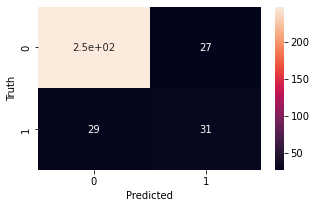

In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_unseen,unseen_predicted)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm)
print("True negatives: " + str(cm[0][0]))
print("False negatives: " + str(cm[1][0]))
print("True Positives: " + str(cm[1][1]))
print("False Positives: " + str(cm[0][1]))

In [46]:

# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_unseen, unseen_predicted)

0.8323353293413174

In [47]:

# Precision score
from sklearn.metrics import precision_score
precision_score(y_unseen, unseen_predicted)

0.5344827586206896

In [49]:

 
# ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_unseen, unseen_predicted)

0.7090632603406326

In [51]:
# Recall score
from sklearn.metrics import recall_score
recall_score(y_unseen, unseen_predicted)

0.5166666666666667